In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing The ImageDataGenerator Library**

In [ ]:
# For numerical analysis
import numpy as np
#open source used for both ML and DL for computation
import tensorflow 
#it is a plain stack of Layers
from tensorflow.keras.models import Sequential 
 #A Layer consists of a tensor-in tensor-out computation function
from tensorflow.keras import layers
#Dense Layer is the regular deeply connected neural network Layer
from tensorflow.keras.layers import Dense, Flatten
#Faltten-used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout #Convolutional layer
#MaxPooling2D-for downsampling the image
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

**Apply Image DataGenerator Functionality To Trainset And Testset**

In [ ]:
#Applying Image DataGenerator Functionality To Trainset And Testset
x_train = train_datagen.flow_from_directory(
    r'/content/drive/MyDrive/Dataset-20221115T060812Z-001/Dataset/TRAIN_SET/TRAIN_SET',
    target_size=(64, 64),batch_size=5,color_mode='rgb',class_mode='sparse')

Found 2627 images belonging to 5 classes.


In [ ]:

#Applying Image DataGenerator Functionality To Testset
x_test = test_datagen.flow_from_directory(
    r'/content/drive/MyDrive/Dataset-20221115T060812Z-001/Dataset/TEST_SET',
    target_size=(64, 64),batch_size=5,color_mode='rgb',class_mode='sparse')

Found 1055 images belonging to 5 classes.


In [ ]:
#checking the number of classes
print(x_train.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [ ]:
#checking the number of classes
print(x_test.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [ ]:
from collections import Counter as c
c(x_train.labels)

Counter({0: 606, 1: 445, 2: 479, 3: 622, 4: 475})

**Initializing the Model**

In [ ]:
model=Sequential()

**Adding CNN layers**

In [ ]:
# Initializing the CNN classifier = Sequential()
classifier = Sequential()
# First convolution layer and pooling
classifier.add(Conv2D(32,(3, 3), input_shape=(64, 64, 3),activation='relu')) 
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
classifier.add(Conv2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer 
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Flattening the Layers
classifier.add(Flatten())

**Adding Dense Layers**

In [43]:
# Adding fully connected Layer 
classifier.add(Dense (units=128, activation='relu'))
classifier.add(Dense (units=5, activation='softmax')) # softmax for more than 2

In [ ]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)              

**Configure The Learning Process**

In [ ]:

classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Train the model**

In [ ]:
##Fitting the model
classifier.fit_generator(
    generator=x_train,steps_per_epoch = len(x_train), 
    epochs=20,validation_data=x_test,validation_steps = len(x_test)) # No of images in test set

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


526/526 [==============================] - 975s 2s/step - loss: 0.0393 - accuracy: 0.9855 - val_loss: 0.0349 - val_accuracy: 0.9829
Epoch 2/20
526/526 [==============================] - 18s 35ms/step - loss: 2.0681e-04 - accuracy: 1.0000 - val_loss: 0.0176 - val_accuracy: 0.9896
Epoch 3/20
526/526 [==============================] - 18s 35ms/step - loss: 9.3619e-05 - accuracy: 1.0000 - val_loss: 0.0318 - val_accuracy: 0.9839
Epoch 4/20
526/526 [==============================] - 19s 35ms/step - loss: 4.3603e-05 - accuracy: 1.0000 - val_loss: 0.0353 - val_accuracy: 0.9829
Epoch 5/20
526/526 [==============================] - 19s 37ms/step - loss: 2.8767e-05 - accuracy: 1.0000 - val_loss: 0.0235 - val_accuracy: 0.9896
Epoch 6/20
526/526 [==============================] - 18s 35ms/step - loss: 0.1041 - accuracy: 0.9669 - val_loss: 0.6224 - val_accuracy: 0.9450
Epoch 7/20
526/526 [==============================] - 18s 34ms/step - loss: 5.0506e-04 - accuracy: 1.0000 - val_loss: 0.5786 - val_a

**Save the model**

In [26]:
classifier.save('nutrition.h5')

**Test the model**

In [30]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model("nutrition.h5") 

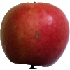

In [45]:
img=image.load_img('/content/drive/MyDrive/Dataset-20221115T060812Z-001/Dataset/TEST_SET/APPLES/151_100.jpg',target_size=(70,70))
img

In [32]:
x = image.img_to_array(img)

In [33]:
x = np.expand_dims(x,axis=0)

In [46]:
index=['APPLES', 'BANANA', 'ORANGE','PINEAPPLE','WATERMELON']
result=str(index[0])
result


'APPLES'